# 5.1 机器学习概述

# 5.2 回归分析

## 5.2.2 回归分析实现

In [15]:
import numpy as np
import pandas as pd

In [16]:
import pandas as pd
filename = 'C:/Users/David/Documents/jupyter notebook/data/advertising.csv'
data = pd.read_csv(filename, index_col = 0)
print(data.iloc[0:5, :])

      TV  Weibo  WeChat  Sales
1  230.1   37.8    69.2   22.1
2   44.5   39.3    45.1   10.4
3   17.2   45.9    69.3    9.3
4  151.5   41.3    58.5   18.5
5  180.8   10.8    58.4   12.9


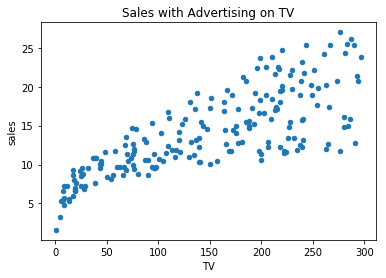

In [17]:
#2.绘制自变量与目标变量之间的散点图,电视广告与销量之间的关联
import matplotlib.pyplot as plt
data.plot(kind='scatter',x='TV',y='Sales',title='Sales with Advertising on TV')
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()

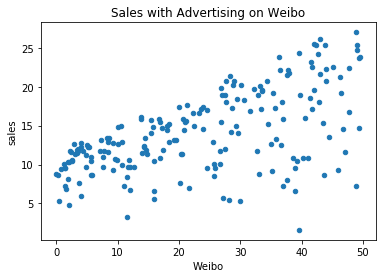

In [18]:
#微博广告与销量之间的关联
data.plot(kind='scatter',x='Weibo',y='Sales',title='Sales with Advertising on Weibo')
plt.xlabel("Weibo")
plt.ylabel("sales")
plt.show()

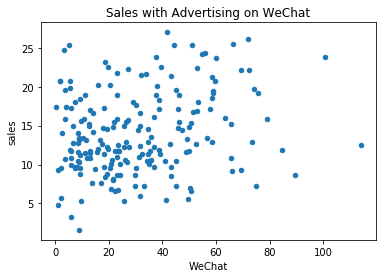

In [19]:
#微信广告与销量之间的关联
data.plot(kind='scatter',x='WeChat',y='Sales',title='Sales with Advertising on WeChat')
plt.xlabel("WeChat")
plt.ylabel("sales")
plt.show()

In [20]:
#3. 建立3个自变量与目标变量的线性回归模型，计算误差。
X = data.iloc[:,0:3].values.astype(float)
y = data.iloc[:,3].values.astype(float)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()  
linreg.fit(X, y)
#输出线性回归模型的截距和回归系数
print (linreg.intercept_, linreg.coef_)

2.938889369459412 [ 0.04576465  0.18853002 -0.00103749]


In [21]:
#4.保存回归模型导文件，以便后续加载使用
from sklearn.externals import joblib
joblib.dump(linreg, 'linreg.pkl')   #保存至文件

['linreg.pkl']

In [22]:
#重新加载预测数据
import numpy as np
load_linreg = joblib.load('linreg.pkl')  #从文件读取模型
new_X = np.array([[130.1,87.8,69.2]])
print("6月广告投入：",new_X)
print("预期销售：",load_linreg.predict(new_X) ) #使用模型预测

6月广告投入： [[130.1  87.8  69.2]]
预期销售： [25.37401071]


### 5.2.3 回归分析性能评估

In [24]:
#1. 将数据集分割为训练集和测试集
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.35, random_state=1)

In [25]:
linregTr = LinearRegression()
linregTr.fit(X_train, y_train)
print(linregTr.intercept_, linregTr.coef_)

2.9324713466040837 [0.04608839 0.18047646 0.00411699]


In [26]:
from sklearn import metrics
y_train_pred = linregTr.predict(X_train)
y_test_pred = linregTr.predict(X_test)
train_err = metrics.mean_squared_error(y_train, y_train_pred) 
test_err = metrics.mean_squared_error(y_test, y_test_pred) 
print( 'The mean squar error of train and test are: {:.2f}, {:.2f}'.format(train_err, test_err) )

The mean squar error of train and test are: 3.06, 2.32


In [27]:
predict_score = linregTr.score(X_test, y_test)
print('The decision coeficient is :{:.2f}'.format(predict_score))

The decision coeficient is :0.91


In [28]:
#4. 使用所有数据训练的模型性能测试
predict_score1 =linreg.score(X_test,y_test)
print('The decision coeficient of model trained with all is: {:.2f} '.format(predict_score1) )
y_test_pred1 = linreg.predict(X_test)
test_err1 = metrics.mean_squared_error(y_test, y_test_pred1) 
print( 'The mean squar error of test with all: {:.2f}'.format(test_err1) )

The decision coeficient of model trained with all is: 0.92 
The mean squar error of test with all: 2.23


# 5.3 分类分析

## 5.3.1 分类学习原理

## 5.3.2 决策树                                           

### 2. 决策树实现

In [29]:
#银行贷款偿还决策树分析

#读入数据
import pandas as pd

filename = 'data/bankdebt.csv'
data = pd.read_csv(filename, nrows = 5, index_col = 0, header = None)
print(data.values)

[['Yes' 'Single' 12.5 'No']
 ['No' 'Married' 10.0 'No']
 ['No' 'Single' 7.0 'No']
 ['Yes' 'Married' 12.0 'No']
 ['No' 'Divorced' 9.5 'Yes']]


In [30]:
#数据预处理
data = pd.read_csv(filename, index_col = 0, header = None)
data.loc[data[1] == 'Yes',1 ] = 1
data.loc[data[1] == 'No',1 ] = 0
data.loc[data[4] == 'Yes',4 ] = 1
data.loc[data[4] == 'No',4 ] = 0
data.loc[data[2] == 'Single',2 ] = 1
data.loc[data[2] == 'Married',2 ] = 2
data.loc[data[2] == 'Divorced',2] = 3
print( data.loc[1:5,:] )

   1  2     3  4
0               
1  1  1  12.5  0
2  0  2  10.0  0
3  0  1   7.0  0
4  1  2  12.0  0
5  0  3   9.5  1


In [31]:
#取data前4列数据作为特征属性值,最后一列作为分类值
X = data.loc[ :, 1:3 ].values.astype(float)
y = data.loc[ :, 4].values.astype(int)

#训练模型，预测样本分类
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X,y)  # 计算分类器的Accuracy

1.0

In [32]:
#评估分类器性能,计算混淆矩阵，Precision 和 Recall
predicted_y = clf.predict(X)
from sklearn import metrics
print(metrics.classification_report(y, predicted_y))
print('Confusion matrix:' )
print( metrics.confusion_matrix(y, predicted_y) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion matrix:
[[10  0]
 [ 0  5]]


In [33]:
#生成并显示决策树图
featureName =['House', 'Marital', 'Income']
className = ['Cheat','Not Cheat']

In [35]:
#生成图
from graphviz import Source
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=featureName,class_names=className))

In [ ]:
#保存到文件中并显示
png_bytes = graph.pipe(format='png')
with open('dectree.png','wb') as f:
    f.write(png_bytes)
from IPython.display import Image
Image(png_bytes)

### 5.3 支持向量机（SVM）

In [40]:
#例5-4 银行投资业务推广SVM分析

#读入数据
import pandas as pd

filename = 'data/bankpep.csv'
data = pd.read_csv(filename, index_col = 'id')
print( data.iloc[0:5,:])

         age     sex      region   income married  children  car save_act  \
id                                                                          
ID12101   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
ID12102   40    MALE        TOWN  30085.1     YES         3  YES       NO   
ID12103   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
ID12104   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
ID12105   57  FEMALE       RURAL  50576.3     YES         0   NO      YES   

        current_act mortgage  pep  
id                                 
ID12101          NO       NO  YES  
ID12102         YES      YES   NO  
ID12103         YES       NO   NO  
ID12104         YES       NO   NO  
ID12105          NO       NO   NO  


In [41]:
#将最数据中的‘YES’和‘NO'转换成代表分类的整数 1 和 0
seq = ['married', 'car', 'save_act', 'current_act', 'mortgage', 'pep']
for feature in seq :  # 逐个特征进行替换
    data.loc[ data[feature] == 'YES', feature ] =1
    data.loc[ data[feature] == 'NO', feature ] =0

#将性别转换为整数1和0
data.loc[ data['sex'] == 'FEMALE', 'sex'] =1
data.loc[ data['sex'] == 'MALE', 'sex'] =0
print(data[0:5])

         age  sex      region   income  married  children  car  save_act  \
id                                                                         
ID12101   48    1  INNER_CITY  17546.0        0         1    0         0   
ID12102   40    0        TOWN  30085.1        1         3    1         0   
ID12103   51    1  INNER_CITY  16575.4        1         0    1         1   
ID12104   23    1        TOWN  20375.4        1         3    0         0   
ID12105   57    1       RURAL  50576.3        1         0    0         1   

         current_act  mortgage  pep  
id                                   
ID12101            0         0    1  
ID12102            1         1    0  
ID12103            1         0    0  
ID12104            1         0    0  
ID12105            0         0    0  


In [52]:
#将离散特征数据进行独热编码，转换为dummies矩阵（每一行只可能出现一个1）
dumm_reg = pd.get_dummies( data['region'], prefix='region' )
print(dumm_reg[0:5])

         region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN
id                                                                    
ID12101                  1             0                0            0
ID12102                  0             0                0            1
ID12103                  1             0                0            0
ID12104                  0             0                0            1
ID12105                  0             1                0            0


In [48]:
dumm_child = pd.get_dummies( data['children'], prefix='children' )
print(dumm_child[0:5])

         children_0  children_1  children_2  children_3
id                                                     
ID12101           0           1           0           0
ID12102           0           0           0           1
ID12103           1           0           0           0
ID12104           0           0           0           1
ID12105           1           0           0           0


In [49]:
#删除dataframe中原来的两列后再 jion dummies
df1 = data.drop(['region','children'], axis = 1)
print( df1[0:5])

         age  sex   income  married  car  save_act  current_act  mortgage  pep
id                                                                            
ID12101   48    1  17546.0        0    0         0            0         0    1
ID12102   40    0  30085.1        1    1         0            1         1    0
ID12103   51    1  16575.4        1    1         1            1         0    0
ID12104   23    1  20375.4        1    0         0            1         0    0
ID12105   57    1  50576.3        1    0         1            0         0    0


In [50]:
df2 = df1.join([dumm_reg,dumm_child], how='outer')
print( df2[0:2])

         age  sex   income  married  car  save_act  current_act  mortgage  \
id                                                                          
ID12101   48    1  17546.0        0    0         0            0         0   
ID12102   40    0  30085.1        1    1         0            1         1   

         pep  region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  \
id                                                                            
ID12101    1                  1             0                0            0   
ID12102    0                  0             0                0            1   

         children_0  children_1  children_2  children_3  
id                                                       
ID12101           0           1           0           0  
ID12102           0           0           0           1  


In [54]:
#准备训练输入变量
X = df2.drop(['pep'], axis=1).values.astype(float)
#X = df2.iloc[:,:-1].values.astype(float)
y = df2['pep'].values.astype(int)
print("X.shape", X.shape)
print(X[0:2,:])
print(y[0:2])

X.shape (600, 16)
[[4.80000e+01 1.00000e+00 1.75460e+04 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00]
 [4.00000e+01 0.00000e+00 3.00851e+04 1.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00]]
[1 0]


In [56]:
#训练模型，评价分类器性能
from sklearn import svm
from sklearn import metrics
clf = svm.SVC(kernel='rbf', gamma=0.6, C = 1.0)
clf.fit(X, y)
print( "Accuracy：",clf.score(X, y) )
y_predicted = clf.predict(X)
print( metrics.classification_report(y, y_predicted) )

Accuracy： 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       274

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [64]:
#将数据集拆分为训练集和测试集，在测试集上查看分类效果
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)
clf = svm.SVC(kernel='rbf', gamma=0.7, C = 1.0)
clf.fit(X_train, y_train)
print("Performance on training set:", clf.score(X_train, y_train) )
print("Performance on test set:", clf.score(X_test, y_test) )

Performance on training set: 1.0
Performance on test set: 0.5555555555555556


In [65]:
#对不同方差的数据标准化
from sklearn import preprocessing
X_scale = preprocessing.scale(X)

#将标准化后的数据集拆分为训练集和测试集，在测试集上查看分类效果
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scale, y, test_size=0.3, random_state=1)
clf = svm.SVC(kernel='poly', gamma=0.6, C = 0.001)
clf.fit(X_train, y_train)
print( clf.score(X_test, y_test) )

0.8055555555555556


In [67]:
#查看在测试集上混淆矩阵，Precision、Recall和F1
y_predicted = clf.predict(X_test)
print("Classification report for %s" % clf)

print (metrics.classification_report(y_test, y_predicted) )
print( "Confusion matrix:\n", metrics.confusion_matrix(y_test, y_predicted) )

Classification report for SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.6, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       100
           1       0.78      0.79      0.78        80

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion matrix:
 [[82 18]
 [17 63]]


# 5.4 聚类任务

## 5.4.2 聚类算法

### 2.K-means 聚类实现

In [2]:
#鸢尾花数据集聚类分析
#从数据集中读入数据
import pandas as pd
filename = 'data/iris.data'
data = pd.read_csv(filename, header = None)
data.columns = ['sepal length','sepal width','petal length','petal width','class']
data.iloc[0:5,:]

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


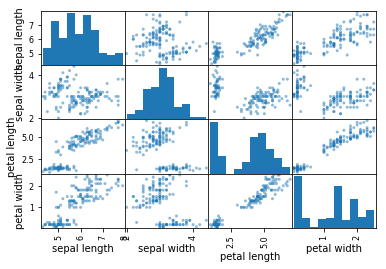

In [3]:
#绘制散点图矩阵，观察特征维度的区分度
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(data, diagonal='hist')
plt.show()

In [4]:
#生成k-means模型
X = data.iloc[:,0:4].values.astype(float)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

means.labels_:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


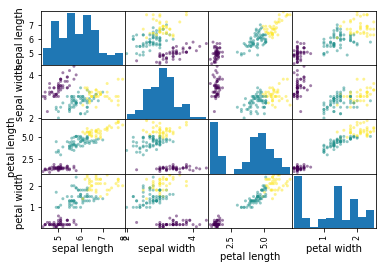

In [5]:
#输出聚类结果，使用‘petal length'和’petal width’绘制散点图，即X的2、3列
print('means.labels_:\n',kmeans.labels_)
pd.plotting.scatter_matrix(data, c=kmeans.labels_, diagonal='hist')
plt.show()

In [6]:
#比较数据类别标签与聚类结果 ARI（Adjusted Rand Index）
from sklearn import metrics
#将类名转换为整数值
data.loc[ data['class'] == 'Iris-setosa', 'class' ] = 0
data.loc[ data['class'] == 'Iris-versicolor', 'class' ] = 1
data.loc[ data['class'] == 'Iris-virginica', 'class' ] = 2
y = data['class'].values.astype(int)
print( 'ARI: ',metrics.adjusted_rand_score(y, kmeans.labels_) )

ARI:  0.7302382722834697


In [7]:
print( kmeans.labels_ )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [8]:
sc = metrics.silhouette_score( X, kmeans.labels_, metric='euclidean' )
print('silhouette_score: ',sc)

silhouette_score:  0.5525919445499757


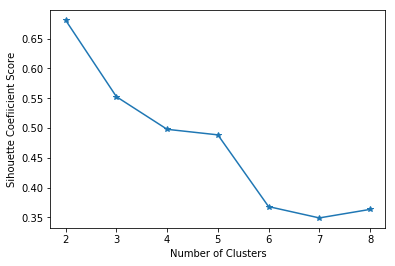

In [9]:
#例5-6：“肘部”观察法，分析合理的簇值
clusters = [2,3,4,5,6,7,8]
sc_scores = []
#计算各个簇模型的轮廓系数
for i in clusters:
    kmeans = KMeans( n_clusters = i).fit(X)
    sc = metrics.silhouette_score( X, kmeans.labels_, metric='euclidean' )
    sc_scores.append( sc )

#绘制曲线图反应轮廓系数与簇数的关系
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sihouette Coefiicient Score')
plt.show()

# 5.5 神经网络与深度学习

### 例5-7  前馈神经网络 鸢尾花数据集分类

In [10]:
#从数据集中读入数据
import pandas as pd
filename = 'data\iris.data'
data = pd.read_csv(filename, header = None)
data.columns = ['sepal length','sepal width','petal length','petal width','class']
data.iloc[0:5,:]

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#计算数据集中每种类别样本数，并给出统计特征
print( data['class'].value_counts() )
data.groupby('class').mean()
data.groupby('class').var()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64


,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


In [16]:
#数据预处理
#convert classname to integer
data.loc[ data['class'] == 'Iris-setosa', 'class' ] = 0
data.loc[ data['class'] == 'Iris-versicolor', 'class' ] = 1
data.loc[ data['class'] == 'Iris-virginica', 'class' ] = 2

D:\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


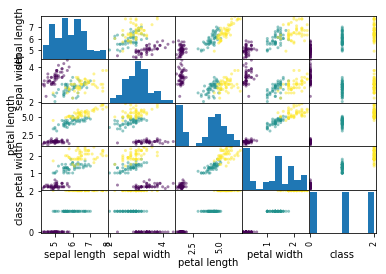

In [17]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(data, c=data['class'].values, diagonal='hist')
plt.show()

In [18]:
#data
X = data.iloc[:,0:4].values.astype(float)
y = data.iloc[:,4].values.astype(int)

In [19]:
#训练神经网络分类器模型
from sklearn.neural_network import MLPClassifier
#创建一个2层隐层，每层5个结点
mlp = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)
mlp.fit(X,y)
print("Train with complete data set: ",mlp.score(X,y))

Train with complete data set:  0.9866666666666667


In [20]:
from sklearn import metrics
y_predicted = mlp.predict(X)
print("Classification report for %s" % mlp)

Classification report for MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [21]:
print(metrics.classification_report(y, y_predicted) )
print( "Confusion matrix:\n", metrics.confusion_matrix(y, y_predicted) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Confusion matrix:
 [[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
